# Assignment 3: Reinforcement Learning Pipeline in Practice


*CS260R: Reinforcement Learning. Department of Computer Science at University of California, Los Angeles.
Course Instructor: Professor Bolei ZHOU. Assignment author: Zhenghao PENG.*

-----


## TODOs

You need to implement all TODOs in the python files. Then run all cells in this notebook and plot your results. 

Note:

1. You can run the training in your terminal and selectively run the visualization and evaluation cells in this notebook.
2. You need to remove the "REFERENCE" in figures.
3. You don't need to exactly reproduce our results, but your implementation should show the similar progress in training.
4. We use multi-processing to enable asynchronous data sampling. Therefore in many places the tensors have shape `[num_steps, num_envs, num_feat]`. This means that `num_envs` environments are running concurrently and each of them samples a fragment of trajectory with length `num_steps`. There are totally `num_steps*num_envs` transitions are generated in each training iteration.
5. Each process can only have a single MetaDrive environment.
6. The jupyter notebook is used for tutorial and visualization. It is optional for you to use the notebook to call `train_ppo|td3.py` and `eval_ppo|td3.py`. But we expect to see figures, results and visualization in this notebook.




We are expecting the following figures, results and visualization:

1. TD3 in Pendulum-v1: learning curve (2.1)
2. TD3 in MetaDrive-Tut-Hard-v0: learning curve (2.2), evaluation result (2.3)
3. PPO in CartPole-v1: learning curve (3.1)
4. PPO in MetaDrive-Tut-Hard-v0: learning curve (3.2), evaluation result (3.3), visualization (3.4)


### File structure

You need to pay attention to the files below:

TD3: 

* `core/td3_trainer.py` - File which can be directly run to train TD3. **Please implement TD3 here.**

PPO:

* `train_ppo.py` - Train scripts for PPO in CartPole-v0 and MetaDrive. **Please implement TODO in this file.**
* `core/ppo_trainer.py` - PPO algorithm. **Please implement `compute_action` and `compute_loss`.**
* `core/buffer.py` - Supporting data structure for PPO (GAE is implemented here). **Please implement `compute_returns` for PPO.**

Common:

* `assignment3.ipynb` - Useful jupyter notebook to walk you through the whole assignment. You need to plot figures and results here.
* `[train|eval]_[ppo|td3].py` - The entries to training and evaluation.


### Deliverables

1) The exported **PDF file** of the this notebook.
2) Compress all files in the `assignment3` folder and prepare a **ZIP file**. No `.rar` or other format is allowed.

You need to submit **both the ZIP file and the PDF file** to bruinlearn. The PDF file goes to gradescope tab and the 
ZIP file goes to the assignment tab.



### Colab supporting

Though we use multiple files to implement algorithms, we can still leverage Colab for free computing resources. 

* Step 1: Create a folder in your Google Drive root named `cs260r`
* Step 2: Upload the files in `assignment3` folder such as `train_ppo.py` and the folder `core` to the newly created `cs260r` folder in your Google Drive.
* Step 3: Run the last cell in Demo 1 (pay attention to the code we mount the colab to your google drive).




## Demo 1: Setup dependencies

In [1]:
!pip install torch

# Install MetaDrive, a lightweight driving simulator
!pip install git+https://github.com/metadriverse/metadrive

# Test whether MetaDrive is properly installed. No error means the test is passed.
!python -m metadrive.examples.profile_metadrive --num-steps 100

!pip install pandas scipy seaborn tabulate pyyaml

  Cloning https://github.com/metadriverse/metadrive to /tmp/pip-req-build-s_eluw78
  Running command git clone --filter=blob:none --quiet https://github.com/metadriverse/metadrive /tmp/pip-req-build-s_eluw78
  Resolved https://github.com/metadriverse/metadrive to commit c29cc37d30158fe70d963647b6c80dc814248f60
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 MB 26.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 29.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.1 MB/s eta 0:00:00
  Created wheel for metadrive-simulator: filename=metadrive_simulator-0.4.3-py3-none-any.whl size=55036646 sha256=c430162a56d75ab1d247076a47905acd1629478f1857d4a458f3bb85c9d6256e
  Stored in directo

In [2]:
import os

try:
    from google.colab import drive
    drive.mount('/content/gdrive')

    DRIVE_PATH = '/content/gdrive/My Drive/cs260r'  # No need for backslash
    if not os.path.exists(DRIVE_PATH):
        !mkdir -p "$DRIVE_PATH"  # Ensure the folder exists

    # Create a symlink to avoid issues with spaces in 'My Drive'
    SYM_PATH = '/content/cs260r'
    if not os.path.exists(SYM_PATH):
        !ln -s "$DRIVE_PATH" "$SYM_PATH"

    running_in_colab = True
    
    # We already mounted in our google drive.
    # Enter the foler where you put files in:
    %cd '/content/cs260r'

except ModuleNotFoundError:
    running_in_colab = False
    print("I guess you are running locally. If you get this message in Colab, something is wrong.")

print("\nCurrent working directory:")
!pwd

print("\nWhat files are there:")
!ls

I guess you are running locally. If you get this message in Colab, something is wrong.

Current working directory:

What files are there:


'pwd' is not recognized as an internal or external command,
operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.


## Demo 2: Train a TD3 agent

Spinning Up tutorial provides great explaination on TD3 algorithm:
https://spinningup.openai.com/en/latest/algorithms/td3.html

Please implement all TODOs in `core/td3_trainer.py` and `train_td3.py`.

### Demo 2.1: Train TD3 agent in Pendulum-v1

In [3]:
!python train_td3.py \
--env-id Pendulum-v1 \
--log-dir Pendulum-v1 \
--max-steps 50000 \
--start-steps 1000 \
--lr 1e-3

c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core

 ===== TD3 Training Step 1199 =====:
  actor_loss: 7.970963478088379
  critic_loss: 0.4319217801094055
  current_q1: -8.228772163391113
  current_q2: -8.209493637084961
  episode_reward: -1189.0687228297813
  frame_per_second: 434
  log_dir: Pendulum-v1
  reward: -5.9341607093811035
  target_q: -8.23111343383789
  total_episodes: 6
  total_steps: 1199
  total_time: 2.75960111618042

Trainer is saved at <Pendulum-v1\td3>. Progress is saved at <Pendulum-v1\td3\progress.csv>.

 ===== TD3 Training Step 2199 =====:
  actor_loss: 22.961002349853516
  critic_loss: 2.783449172973633
  current_q1: -23.12727165222168
  current_q2: -23.265701293945312
  episode_reward: -1342.107337913658
  frame_per_second: 152
  log_dir: Pendulum-v1
  reward: -7.0114641189575195
  target_q: -23.062841415405273
  total_episodes: 11
  total_steps: 2199
  total_time: 14.381691932678223


 ===== TD3 Training Step 3199 =====:
  actor_loss: 36.2866325378418


Training Step: 100%|██████████| 50000/50000 [08:53<00:00, 93.78it/s] 


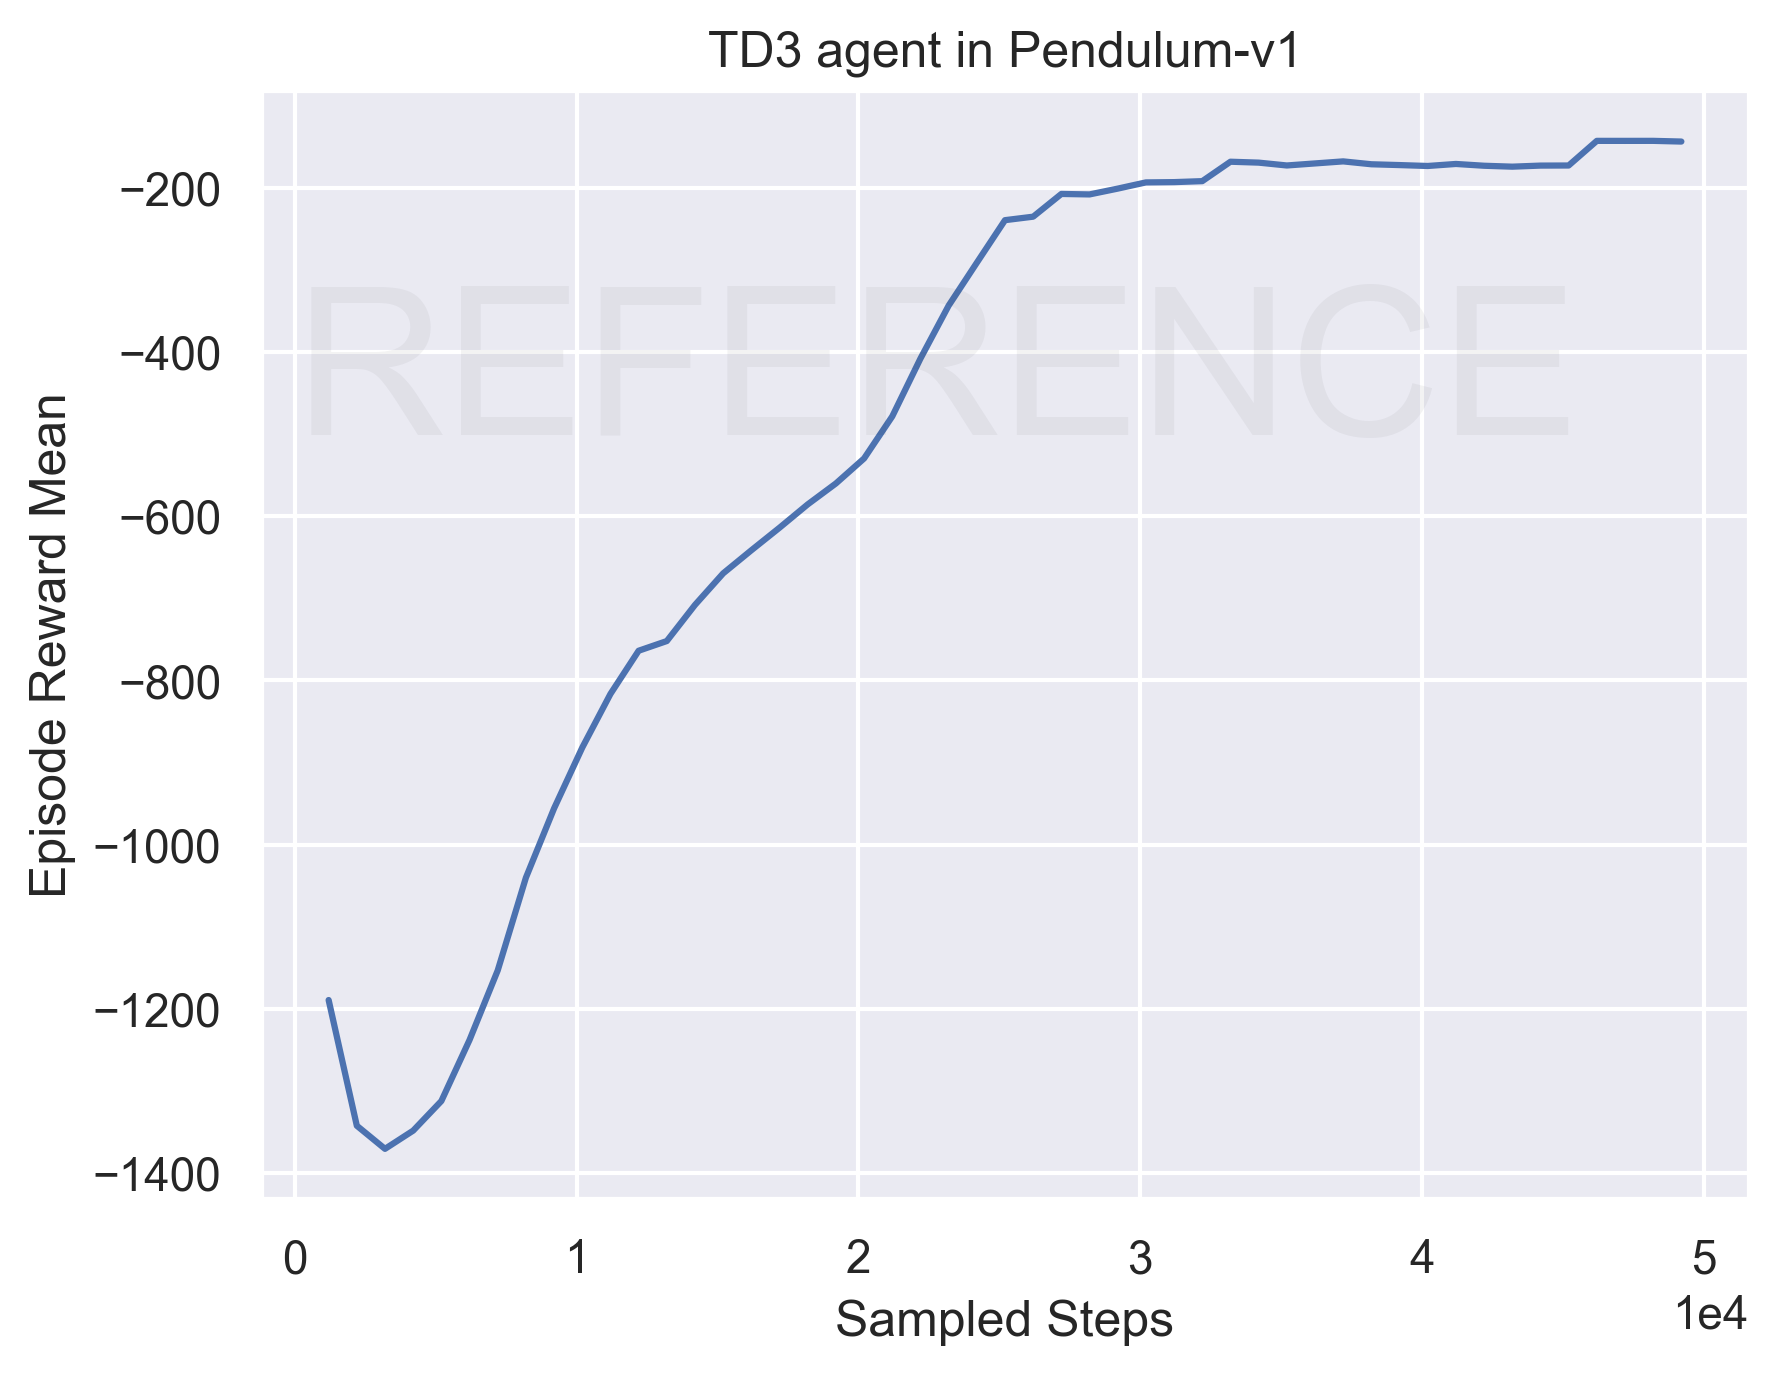

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("Pendulum-v1/td3/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("TD3 agent in Pendulum-v1")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

# TODO: You should remove this line in your code.
ax.annotate("REFERENCE", (0, -500), size=50, alpha=0.05)

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('pendulum-td3.png', format='png', dpi=300, bbox_inches="tight")


### Demo 2.2: Train TD3 agent in MetaDrive-Tut-Hard-v0


In [1]:
!python train_td3.py \
--env-id MetaDrive-Tut-Hard-v0 \
--log-dir MetaDrive-Tut-Hard-v0 \
--max-steps 100_000


c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']

 ===== TD3 Training Step 1999 =====:
  actor_loss: .nan
  critic_loss: .nan
  episode_reward: 9.170892539838883
  frame_per_second: 440
  log_dir: MetaDrive-Tut-Hard-v0
  success_rate: 0.0
  target_q: .nan
  total_episodes: 2
  total_steps: 1999
  total_time: 4.536155939102173

Trainer is saved at <MetaDrive-Tut-Hard-v0\td3>. Progress is saved at <MetaDrive-Tut-Hard-v0\td3\progress.csv>.

 ===== TD3 Training Step 2999 =====:
  actor_loss: .nan
  critic_loss: .nan
  episode_reward: 8.766261924850989
  frame_per_second: 458
  log_dir: MetaDrive-Tut-Hard-v0
  success_rate: 0.0
  target_q: .nan
  total_episodes: 3
  total_steps: 2999
  total_time: 6.5452

[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.3
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 1000
[INFO] Assets version: 0.4.3
[INFO] Known Pipes: wglGraphicsPipe
[INFO] Start Scenario Index: 1000, Num Scenarios : 20

Training Step:   1%|          | 989/100000 [00:01<02:43, 606.90it/s][INFO] Episode ended! Scenario Index: 1009 Reason: max step 

Training Step:   2%|▏         | 1993/100000 [00:04<04:51, 335.71it/s][INFO] Episode ended! Scenario Index: 1004 Reason: max step 

Training Step:   3%|▎         | 2999/100000 [00:06<02:52, 563.51it/s][INFO] Episode ended! Scenario Index: 1016 Reason: max step 

Training Step:   4%|▍         | 3980/100000 [00:08<04:53, 327.58it/s][INFO] Episode ended! Scenario Index: 1015 Reason: max step 

Training Step:   5%|▍         | 4986/100000 [00:11<05:54, 267.78it/s][INFO] Episode ended! Scenario Index: 1015 Reason: 

The log contains these keys:  Index(['Unnamed: 0', 'log_dir', 'frame_per_second', 'episode_reward',
       'total_steps', 'total_episodes', 'total_time', 'target_q', 'actor_loss',
       'critic_loss', 'success_rate', 'current_q1', 'current_q2', 'reward'],
      dtype='object')


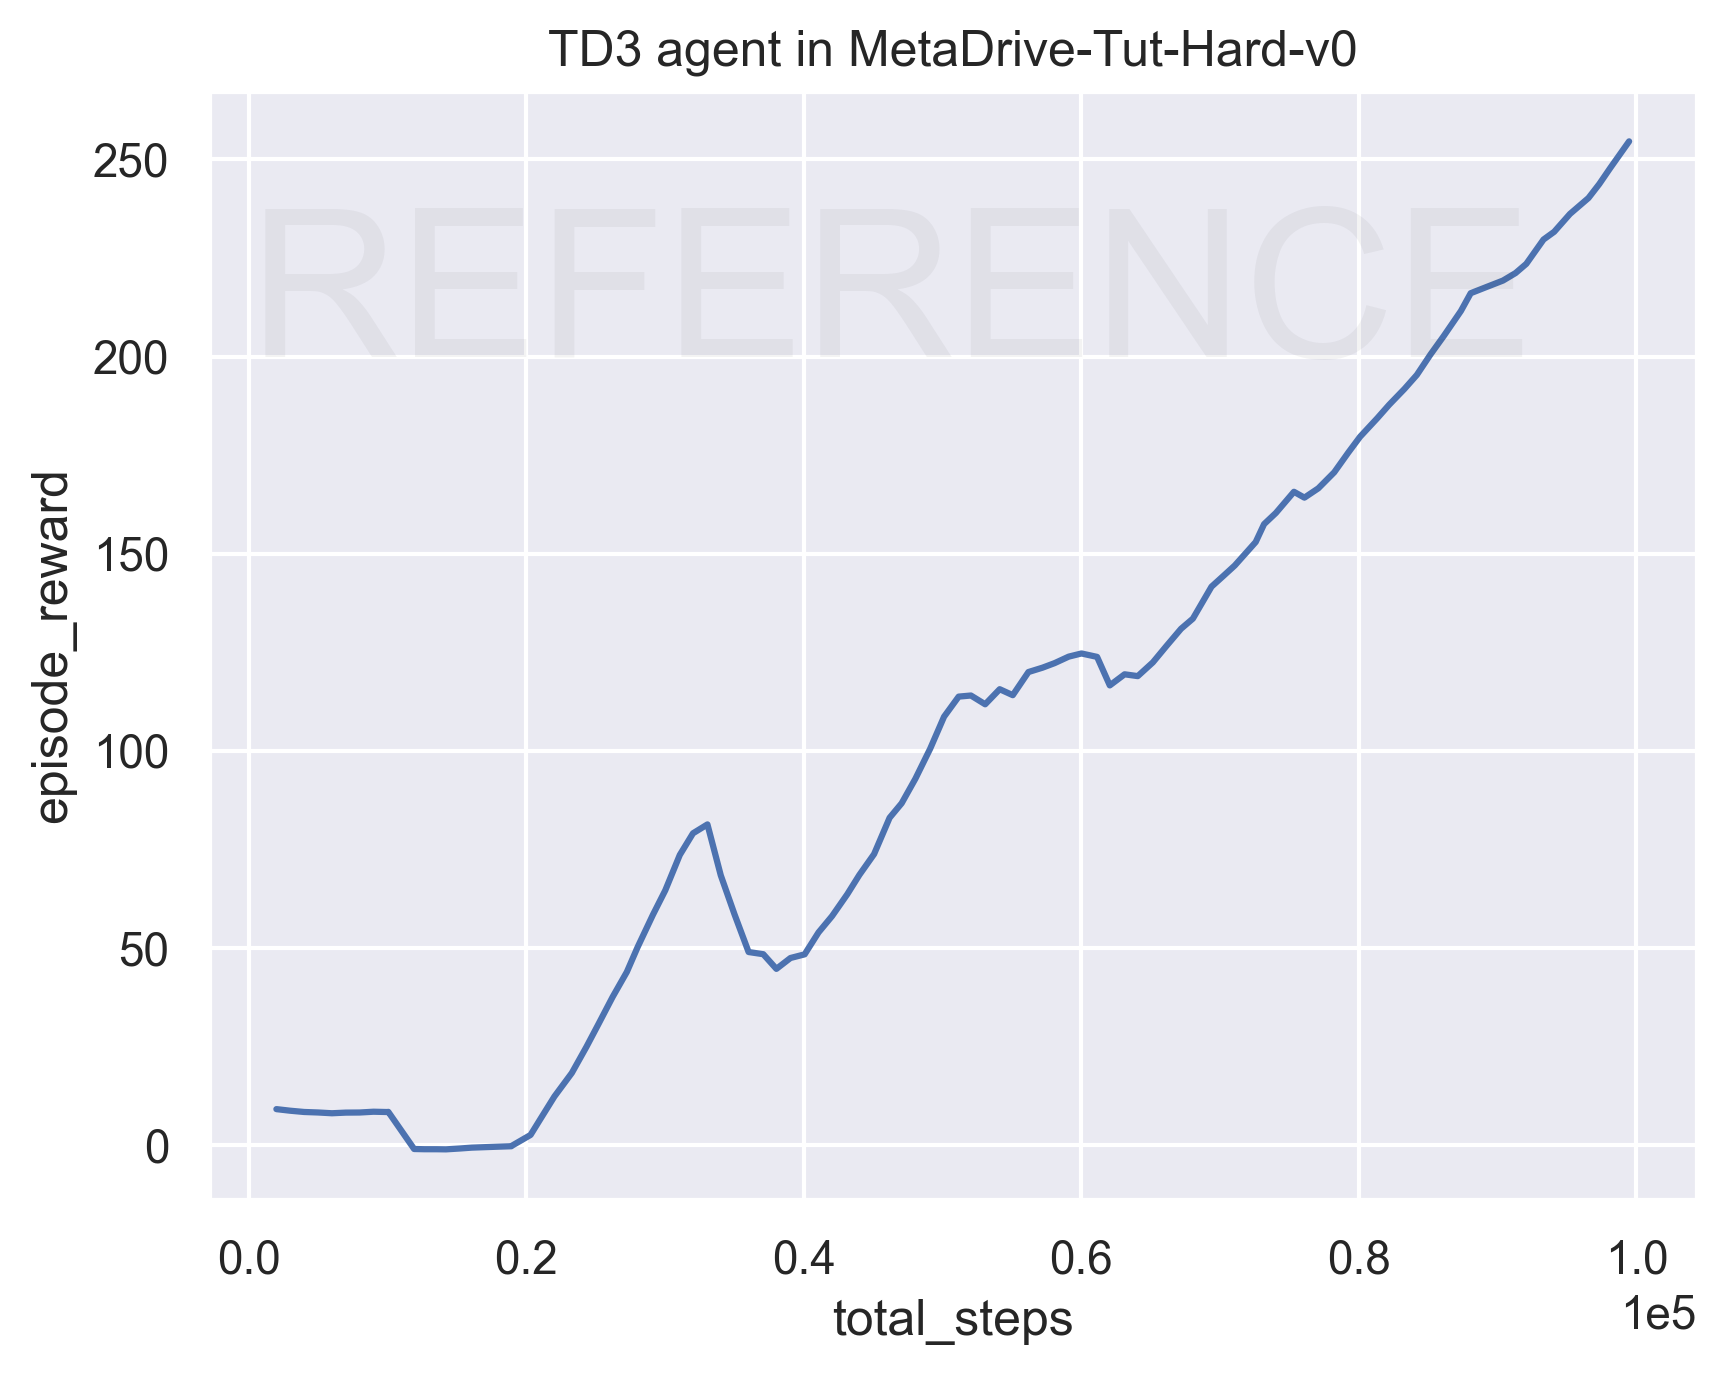

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("MetaDrive-Tut-Hard-v0/td3/progress.csv")
print("The log contains these keys: ", progress.keys())
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("TD3 agent in MetaDrive-Tut-Hard-v0")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# TODO: You should remove this line in your code.
ax.annotate("REFERENCE", (0, 200), size=50, alpha=0.05)

plt.savefig('metadrive-hard-td3.png', format='png', dpi=300, bbox_inches="tight")


### Demo 2.3: Evaluate TD3 in MetaDrive

In [3]:
!python eval_td3.py \
--env-id="MetaDrive-Tut-Hard-v0" \
--log-dir="MetaDrive-Tut-Hard-v0/td3"


c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmby

c:\Users\hmbyx\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-Easy-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Users\hmbyx\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-Hard-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Users\hmbyx\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-1Env-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Users\hmbyx\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-5Env-v0 already in regist

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

td3_eval = pd.read_csv("MetaDrive-Tut-Hard-v0/td3/eval_results.csv")
print("TD3 agent average reward: {}".format(td3_eval.rewards.mean()))

TD3 agent average reward: 273.94993531411257


## Demo 3: Train a PPO agent

You need to finish `core/ppo_trainer.py`, `core/buffer.py` and `train_ppo.py`.

Here we use GAE [1] (Generalized Advantage Estimation) to estimate the advantage. This technique is implemented in `PPORolloutStorage.compute_returns` in `core/buffer.py`. Concretely, we estimate the advantage of current state $t$ via:

$$\delta_t = r_t + \gamma V(s_{t+1}) - V(s_t)$$

$$A^{GAE}_t = \sum_{l=0}^{\infty} (\gamma \lambda) ^ l \delta_{t+l}$$

wherein $V$ is the state value function, $\lambda$ is a hyper-parameter defined in `PPOConfig["gae_lambda"]`.

You can find that when $\lambda = 0$, the GAE estimates advantage in an one-step TD manner. When $\lambda = 1$, the GAE reduces to Monte Carlo Estimation of the state value. Therefore by varying the $\lambda$, we can adjust the trade-off between the accuracy of the estimation, namely the bias, and the variance of the advantage.

[1]: Schulman, John , et al. "High-Dimensional Continuous Control Using Generalized Advantage Estimation." (2015).

### Demo 3.1 Train and draw the learning curve of PPO in CartPole

In [5]:
!python train_ppo.py \
--env-id CartPole-v1 \
--log-dir CartPole-v1 \
--num-envs 10 \
--max-steps 300000

c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
Start training!
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core

 ===== ppo Training Iteration 0 =====:
  adv_mean: 8.483631134033203
  entropy: 0.6849705687700174
  episode_reward: 22.33
  frame_per_second: 2624
  grad_norm: 38.37108349311046
  iteration: 0
  log_dir: c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\CartPole-v1\ppo
  policy_loss: -0.01872127386383139


100%|██████████| 300000/300000 [01:28<00:00, 3442.79it/s]
320000it [01:33, 3490.60it/s]                            
320000it [01:33, 3414.24it/s]


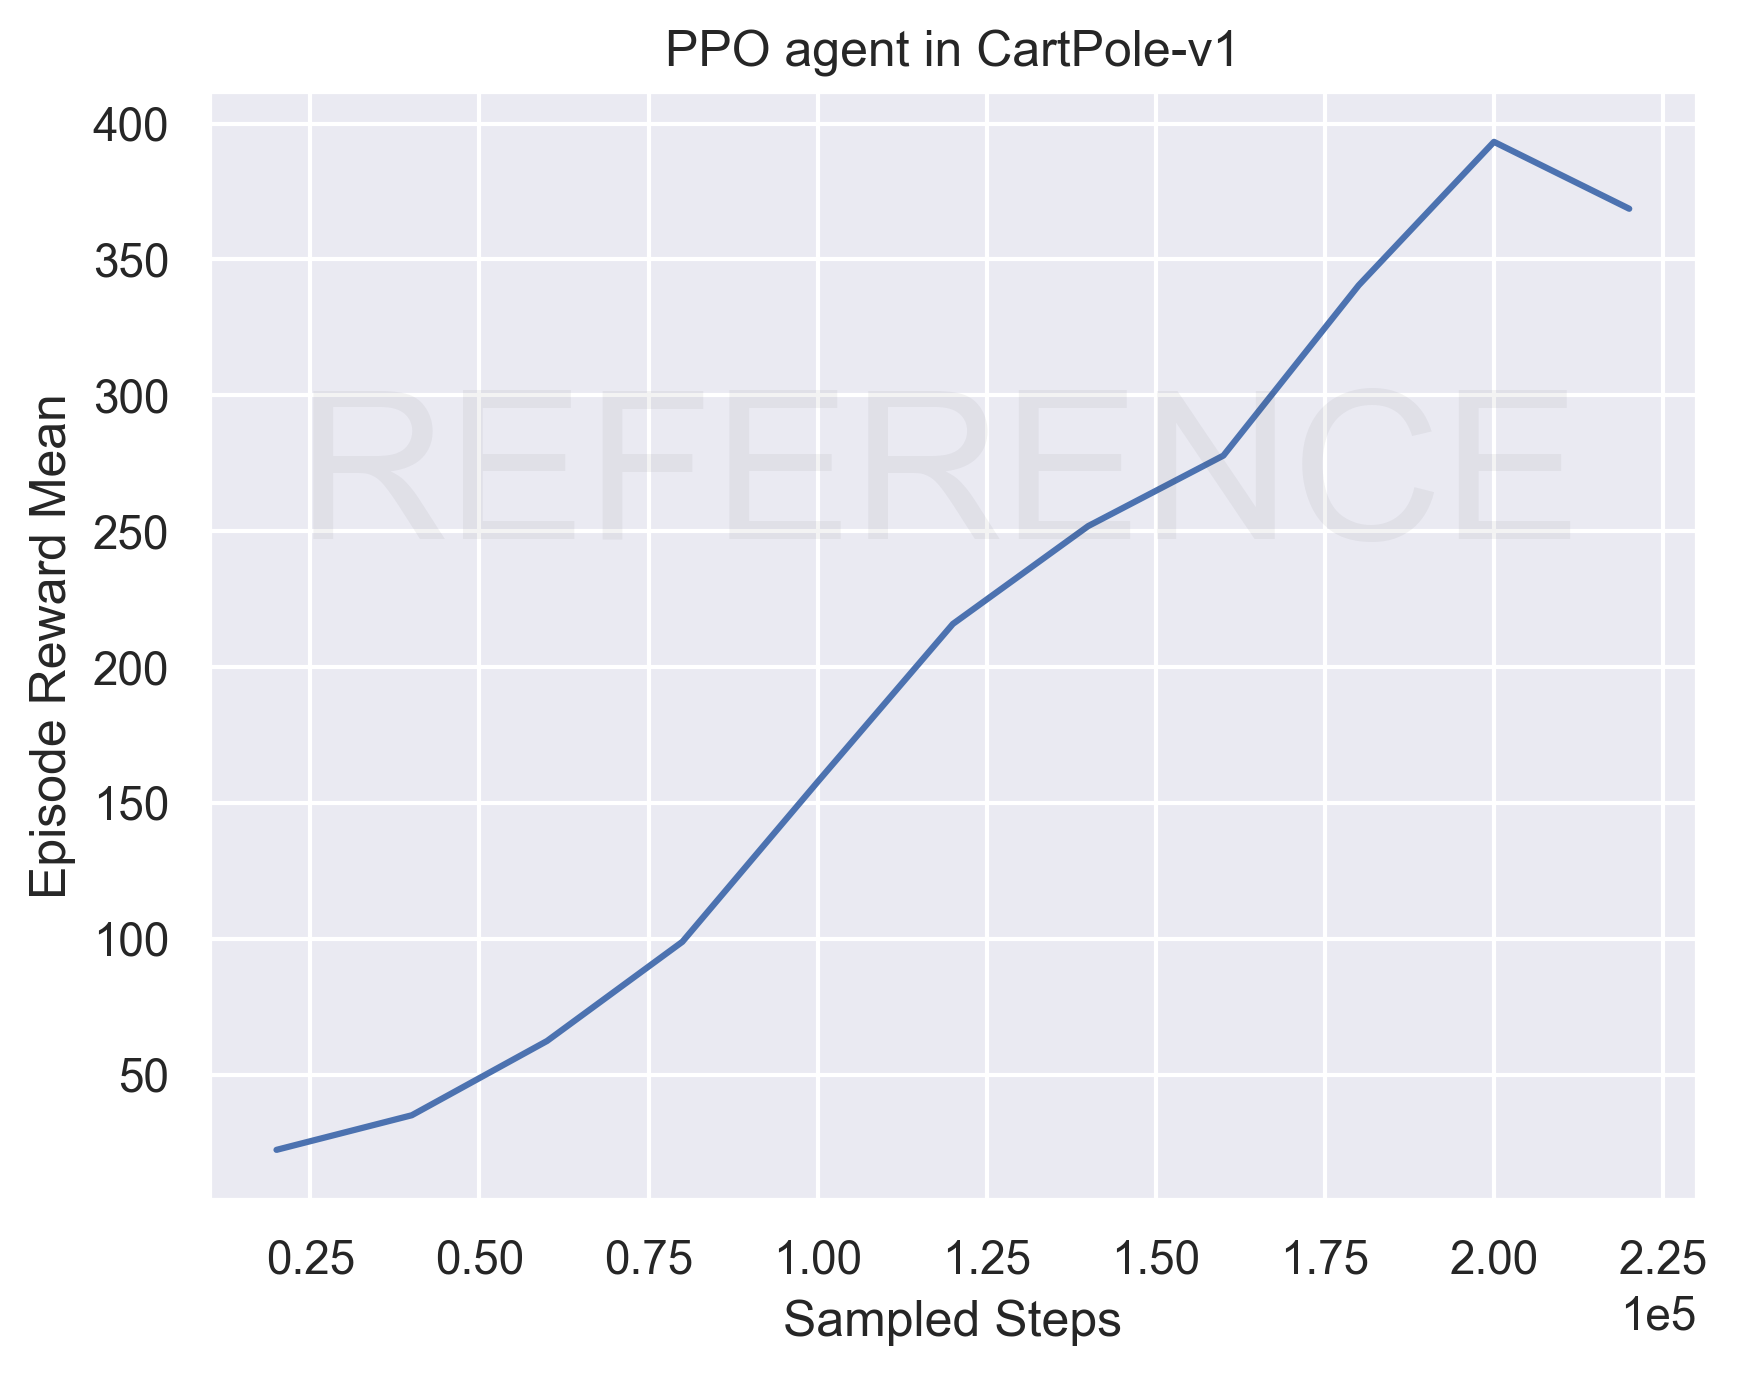

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = pd.read_csv("CartPole-v1/ppo/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("PPO agent in CartPole-v1")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

# You should remove this line in your code:
ax.annotate("REFERENCE", (ax.get_xlim()[1] / 10, ax.get_ylim()[1]*6/10), size=50, alpha=0.05)

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('cartpole-ppo.png', format='png', dpi=300, bbox_inches="tight")


### Demo 3.2: Train and play with the PPO agent in MetaDrive Hard Env.

In [7]:
!python train_ppo.py \
  --env-id MetaDrive-Tut-Hard-v0 \
  --log-dir MetaDrive-Tut-Hard-v0 \
  --num-envs 10 \
  --max-steps 1_000_000

[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.3
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 1000
[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.3
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 1000
[INFO] Assets version: 0.4.3
[INFO] Known Pipes: wglGraphicsPipe
[INFO] Start Scenario Index: 1000, Num Scenarios : 20
[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.3
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 1000
[INFO] Assets version: 0.4.3
[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.3
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_de

c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
Start training!
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
Successfully registered MetaDrive

[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenar

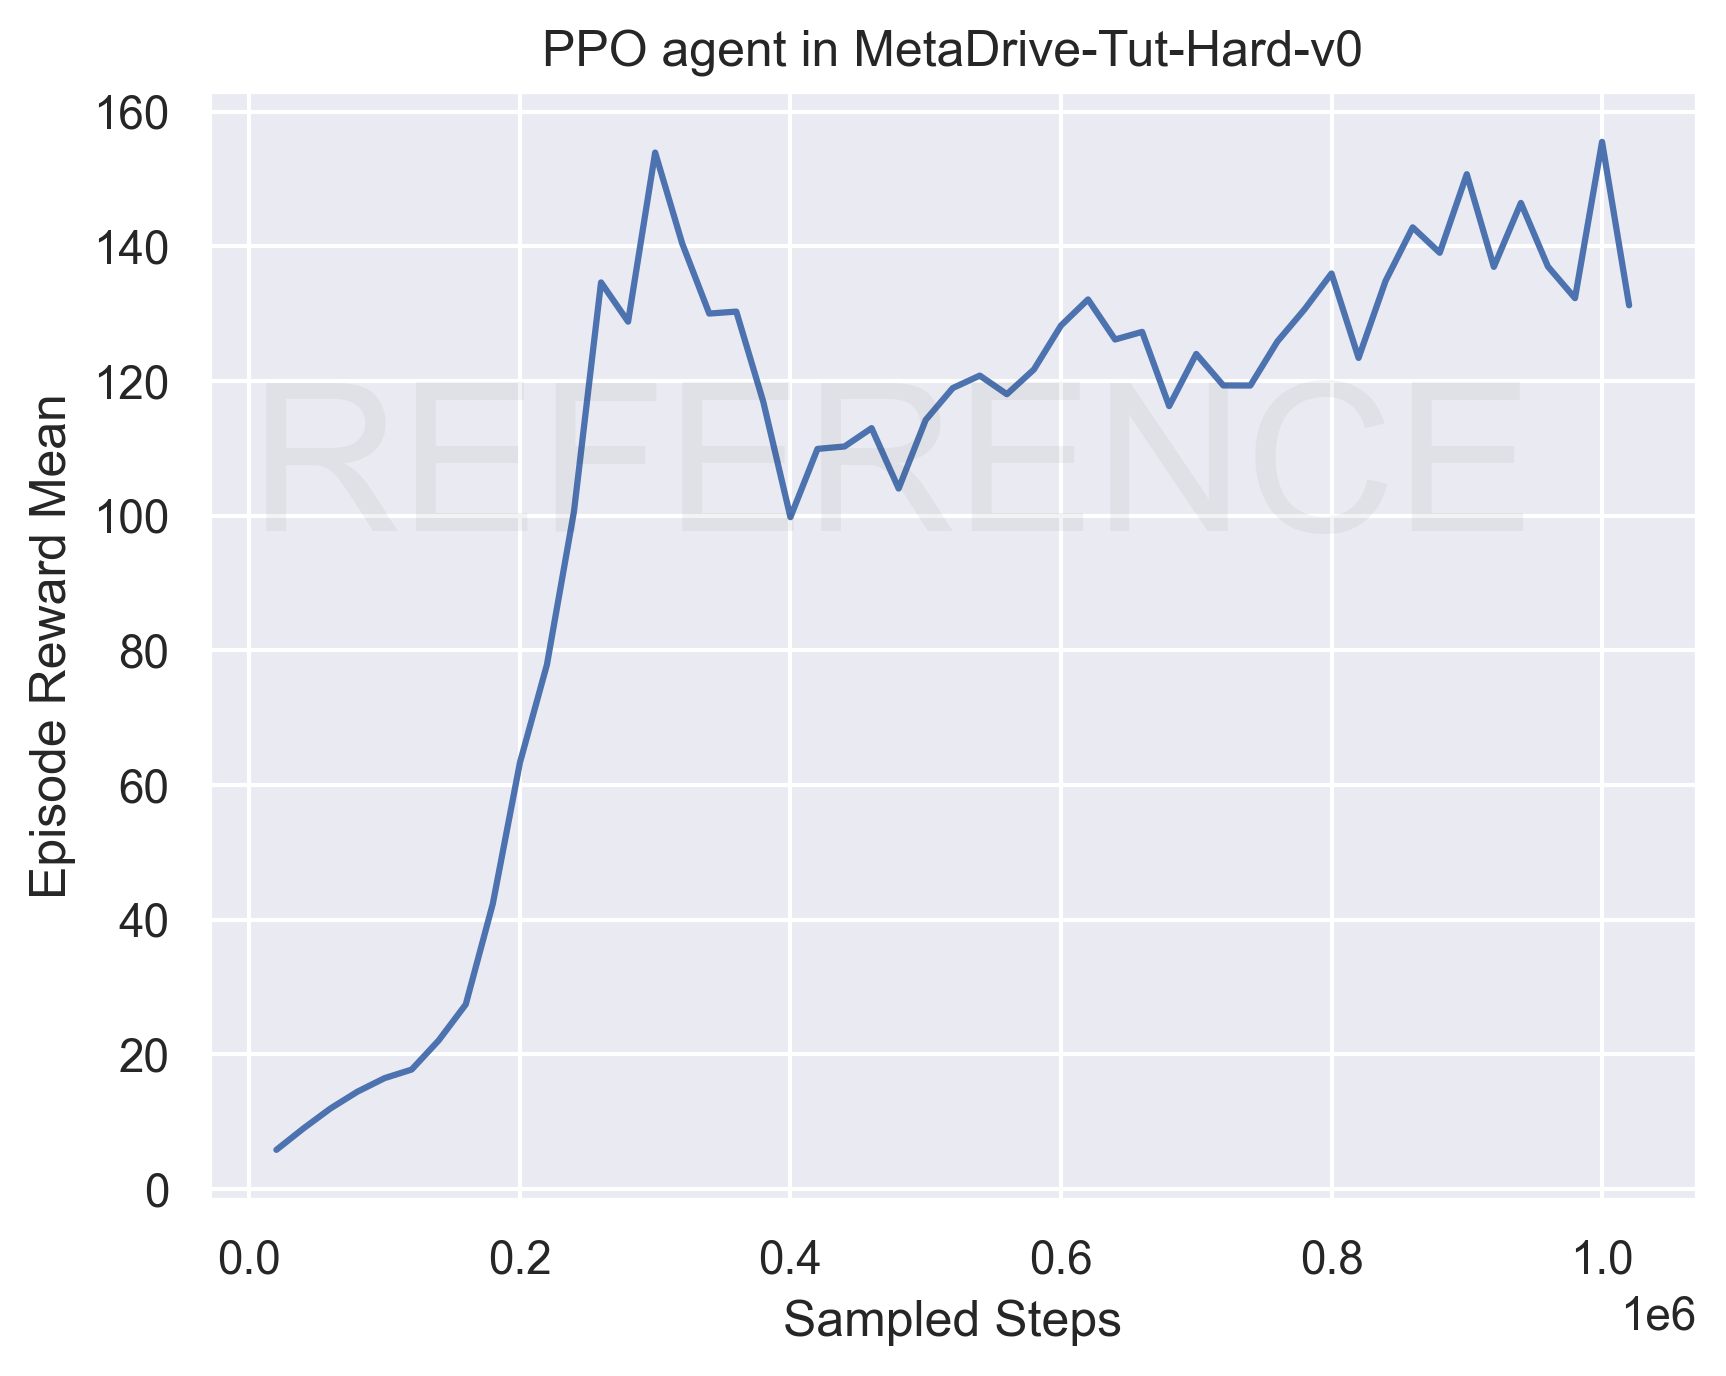

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = pd.read_csv("MetaDrive-Tut-Hard-v0/ppo/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("PPO agent in MetaDrive-Tut-Hard-v0")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# TODO: Remove this line
ax.annotate("REFERENCE", (0, ax.get_ylim()[1]*6/10), size=50, alpha=0.05)

plt.savefig('metadrive-hard-ppo.png', format='png', dpi=300, bbox_inches="tight")


### Demo 3.3: Evaluate PPO in MetaDrive

In [9]:
!python eval_ppo.py \
  --env-id="MetaDrive-Tut-Hard-v0" \
  --log-dir="MetaDrive-Tut-Hard-v0/ppo"

c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
Successfully load weights from C:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\MetaDrive-Tut-Hard-v0\ppo\checkpoint-final.pkl!
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core


c:\Users\hmbyx\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-Easy-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Users\hmbyx\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-Hard-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Users\hmbyx\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-1Env-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Users\hmbyx\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-5Env-v0 already in regist

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_eval = pd.read_csv("MetaDrive-Tut-Hard-v0/ppo/eval_results.csv")
print("PPO agent average reward: {}".format(ppo_eval.rewards.mean()))

PPO agent average reward: 146.2268483303611


### Demo 3.4: Visualize the performance of PPO in MetaDrive Hard Env.

You might have different maps in your visualization, that's expected.

In [11]:
# Load the agent using PolicyAPI (easy to use interface to get policy)

from core.envs import make_envs
import gymnasium as gym
from vis import PPOPolicy, evaluate, animate
import pygame

env_name = "MetaDrive-Tut-Hard-v0"
policy = PPOPolicy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-Tut-Hard-v0/ppo/",
    suffix="final"
)


# Render the learned behavior
# NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate(
    policy=policy, 
    num_episodes=1, 
    env_name=env_name,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

animate(eval_info["frames"])

print("PPO agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))

c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core
c:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\core


[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.3
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 1000


Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']


[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.3
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 1000
[INFO] Assets version: 0.4.3
[INFO] Known Pipes: wglGraphicsPipe
[INFO] Start Scenario Index: 1000, Num Scenarios : 20


Successfully load weights from C:\Users\hmbyx\cs260r-assignment-2025winter\assignment3\MetaDrive-Tut-Hard-v0\ppo\checkpoint-final.pkl!
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.008
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 26.912
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 83.274


[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.


Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 138.108


PPO agent achieves 144.22702199140207 return in MetaDrive Hard environment.
